In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive/DX

/content/drive/MyDrive/DX


# 데이터 로드

In [63]:
# 데이터 불러오기
df = pd.read_csv('./final_df_0511.csv')

In [ ]:
texts = df['contents'].tolist()

In [ ]:
# unnamed 칼럼 제거
#df = df.drop('Unnamed: 0', axis=1)
df.head()

,source,search_words,url,title,contents,tagged_contents,vector,umap_kmeans_cluster
0,블로그,아기+잠깨,https://blog.naver.com/srhymin/223091161466,NaN,저희 아기는 신생아때부터 청각과 촉각이 예민해 잠도 깊게 못 잘 뿐더러 잠투정이 정...,"['저희', '아기', '신생아', '때', '청각', '촉각', '잠도', '못'...",[ 0.18305127 -1.2801502 -0.44998685 0.799018...,4
1,블로그,아기+잠깨,https://blog.naver.com/sukm83/223091879514,NaN,정신없는 주방한켠 뒤죽박죽 알 수 없는 용기에 양념과 소스가 담겨져 있기에 주방이 ...,"['정신', '방한', '뒤죽박죽', '알', '수', '용기', '양념', '소스...",[ 3.5914354e+00 -2.2061694e+00 1.5965343e+00 ...,1
2,블로그,아기+잠깨,https://blog.naver.com/dldptmf5134/223096875782,NaN,안녕하세요 지유맘입니다! 오늘은 지유가 이유식과 유아식 그 중간즈음 토핑식을 할 때...,"['지유', '맘', '오늘', '지유', '이유식', '유아식', '그', '중간...",[ 3.4138811e-01 -5.3281033e-01 -1.3500248e+00 ...,1
3,블로그,아기+잠깨,https://blog.naver.com/lia1100/223095799488,NaN,안녕하세요 라온엄마에요 오늘은 조금 특이한 아기 반찬을 준비했어요 방풍나물을 이용한...,"['엄마', '오늘', '조금', '아기', '반찬', '준비', '방', '나물'...",[ 0.9519698 -1.2839632 -0.3893606 -0.134541...,1
4,블로그,아기+잠깨,https://blog.naver.com/perfect_aj/223095824533,NaN,6 12개월 아기의 1일 권장 물섭취량은 220ml정도라고 한다. 음 우래기는.. ...,"['개월', '아기', '권장', '물섭취량', '정도', '음', '우리', '애...",[ 0.47277522 -0.9469169 1.0451334 -0.120348...,5


# 텍스트 클리닝

In [4]:
# 텍스트 클리닝: HTML 태그 제거, 다중 공백 제거, 양쪽 공백 제거
def clean_text(text):
    text = re.sub(r'<[^>]+>', '', text)  # HTML 태그 제거
    text = re.sub(r'\s+', ' ', text)      # 다중 공백 제거
    text = text.strip()
    return text

In [ ]:
texts = [clean_text(t) for t in texts]
texts[:5]

['저희 아기는 신생아때부터 청각과 촉각이 예민해 잠도 깊게 못 잘 뿐더러 잠투정이 정말 심했어요 아이는 잘 먹고 잘 자야 건강하게 큰다고 하잖아요. 아기에게 수면은 학습능력 발달과 건강한 신체발달을 위한 중요 요소이기 때문에 더욱 신경쓰며 수면교육을 했던 것 같아요. 오늘은 월령시기별 수면교육과 꿀팁 유의 할 점에 대해 알아보도록 하겠습니다! 월령시기별 수면교육 단계 생후 1개월 이 시기의 아기는 밤낮을 구별하지 못하기 때문에 통잠 없이 새벽에도 수유를 하거나 달래줘야 되는 시기죠. 밤에는 불빛을 줄이고 조용히 함으로써 밤은 어둡고 자야된다는 인식을 심어줍니다. 생후 6주 생후 6주가 되면 아기는 신체적으로 한 번에 길게 잘 준비를 합니다. 그래서 보통 부모들은 약 50일부터 수면교육을 시작하죠. 이 시기부터는 매일 일정한 수면패턴을 만들어주는 것이 좋습니다. 저의 경우에는 아이가 밤잠에 들기 전 목욕 천천히 주물러주기 잔잔한 음악으로 패턴을 만들었었는데 이 때 유의 할 점은 패턴의 순서가 바뀌지 않도록 조심해야 됩니다. 생후 4개월 4개월 정도가 되면 수면교육이 완성되어가는 단계입니다. 아기가 자다 깨어 울어도 가급적이면 젖병을 물리지 않도록 하고 만약 잘 자던 아기가 갑자기 깨 보채는 일이 잦아지면 수면시간이 부족한 것은 아닌지 확인해보세요. 돌 이후 돌이 지나면 노는 것이 더 즐겁기 때문에 잠을 안자려 노력합니다. 하지만 정해진 수면시간을 지키기 위해 단호하고 일관된 태도를 보여주는 것이 중요해요. 낮잠 밤잠 수면교육 꿀팁 1 수면 환경을 조성해 주세요. 아기는 스스로 체온을 조절하지 못하기 때문에 외부 환경에 큰 영향을 받으므로 쾌적한 수면환경을 유지해주는 것이 중요합니다. 실내온도와 습도를 22도 내외 50 로 조절하고 실내 공기가 탁해지지 않도록 자주 환기해 주세요. 또한 밤에 쉽게 재우기 위해서는 낮에 아이의 에너지를 다 쓸 수 있도록 충분하게 놀아줘야 됩니다. 밤에 잘 때에는 조명을 약하게 하거나 완전히 불을 끄고 만약 아이가 잠에서 깨어 울더

# GPU 설정

In [ ]:
import torch
print(torch.__version__)               # 설치된 버전 확인
print("CUDA available:", torch.cuda.is_available())

2.6.0+cu124
CUDA available: True


In [ ]:
import torch

if torch.cuda.is_available():
    device = "cuda"
else:
    device = "cpu"
print(device)

cuda


# 임베딩 추출

In [ ]:
from sentence_transformers import SentenceTransformer
from transformers import AutoTokenizer
import numpy as np
import torch

In [ ]:
embedding_model = SentenceTransformer("dragonkue/bge-m3-ko")

## mps settings

In [ ]:
## mps 캐시지우기
import torch

if device == "mps":
    torch.mps.empty_cache()       # PyTorch 2.0+ 부터 지원

In [ ]:
## mps 최대 제한 없애기
import os
os.environ["PYTORCH_MPS_HIGH_WATERMARK_RATIO"] = "0.0"

In [ ]:
# MPS -> CPU 폴백 활성화
import os
os.environ["PYTORCH_ENABLE_MPS_FALLBACK"] = "1"

## sentencetransformer

In [ ]:
# 0) 모델 & 토크나이저 준비 (FP16 캐스팅済 가정)
model = SentenceTransformer("dragonkue/bge-m3-ko", device="cuda")
model._modules["0"].auto_model = model._modules["0"].auto_model.half()
tokenizer = AutoTokenizer.from_pretrained("dragonkue/bge-m3-ko")

In [ ]:
# 1. 토크나이저 준비
from sentence_transformers import SentenceTransformer
model = SentenceTransformer("dragonkue/bge-m3-ko", device="cuda")
model._modules["0"].auto_model = model._modules["0"].auto_model.half()
tokenizer = model.tokenizer

In [ ]:
# 2. 슬라이딩 윈도우 함수 정의
import numpy as np

def embed_paragraph_sliding(para: str,
                            max_length: int = 512,
                            stride: int = 128) -> np.ndarray:
    # 1) 토크나이저에 return_tensors 없이, overflowing만 True로 설정
    enc = tokenizer(
        para,
        max_length=max_length,
        truncation=True,
        stride=stride,
        return_overflowing_tokens=True,
        # return_tensors="pt" **제거**
    )
    # enc['input_ids'] 는 List[List[int]]
    chunk_embs = []
    for chunk_ids in enc["input_ids"]:
        # 2) 토큰 아이디 리스트를 다시 텍스트로 디코딩
        text_chunk = tokenizer.decode(chunk_ids, skip_special_tokens=True)
        # 3) 모델 임베딩 (batch_size=1 고정)
        emb = model.encode(
            [text_chunk],
            batch_size=1,
            show_progress_bar=False
        )
        chunk_embs.append(emb[0])
        # 4) MPS 캐시 파편화 방지
        #torch.mps.empty_cache()

    # 5) 청크 임베딩 평균
    return np.mean(chunk_embs, axis=0)

In [ ]:
# 3. 전체 문단에 적용

# 전체 문단 리스트
paragraphs = texts  # 79942개

# 1) MPS 캐시 초기화
#torch.mps.empty_cache()

# 2) tqdm을 쓰는 임베딩 루프
from tqdm import tqdm
embeddings = []
for para in tqdm(paragraphs, desc="Embedding paragraphs", unit="para"):
    embeddings.append(embed_paragraph_sliding(para))

# embeddings.shape == (79942, 1024)

Embedding paragraphs: 100%|██████████| 79942/79942 [1:55:10<00:00, 11.57para/s]


In [ ]:
import pickle
with open("embeddings_0511.pkl", "wb") as f:
    pickle.dump(embeddings, f)

In [ ]:
# 임베딩 추출 결과 -> (데이터 개수, 임베딩 차원)
print(len(embeddings))

79942


## 임베딩 l2 정규화

In [3]:
import pickle
from sklearn.preprocessing import normalize
from sklearn.metrics.pairwise import cosine_distances

In [4]:
with open("./embeddings_0511.pkl", "rb") as f:
    embeddings = pickle.load(f)

In [5]:
# 코사인 유사도 사용 -> 벡터를 L2 정규화 (벡터 길이를 1로 맞추기)

# L2 정규화 수행
normalized_embeddings = normalize(embeddings)

# UMAP 차원 축소

1. `n_neighbors` (기본값: 15)<br>
	•	이 파라미터는 각 데이터 포인트 주변에서 고려할 이웃의 수를 결정합니다.<br>
	•	역할: 고차원 공간에서 데이터 간의 관계를 계산할 때, 로컬 구조와 글로벌 구조 간의 균형을 조정합니다. 작은 값은 로컬 구조를 강조하고, 큰 값은 글로벌 구조를 더 잘 보존합니다.<br>
	•	작은 값(`n_neighbors=5~15`): 데이터의 로컬 클러스터링을 강조.<br>
	•	큰 값(`n_neighbors=50~200`): 전체 데이터의 글로벌 구조를 더 잘 반영.
<br><br>
2. `min_dist` (기본값: 0.1)<br>
	•	저차원 임베딩에서 데이터 포인트 간 최소 거리를 설정합니다.<br>
	•	역할: 데이터가 얼마나 밀집되거나 분산될지를 결정하며, 클러스터링에 영향을 미칩니다.<br>
	•	작은 값(`min_dist=0.0~0.1`): 데이터 포인트가 더 밀집되어 클러스터링이 뚜렷해짐.<br>
	•	큰 값(`min_dist=0.5~1.0`): 데이터 포인트가 더 분산되어 전체적인 구조를 강조.
<br><br>
3. `n_components`<br>
	•	임베딩 공간의 차원을 설정합니다.<br>
	•	역할: UMAP이 데이터를 저차원으로 축소하는 과정에서 최종적으로 생성될 차원의 수를 결정합니다.<br>
	•	시각화 목적: 일반적으로 2~3차원으로 설정.<br>
	•	머신러닝 모델 입력: 더 높은 차원(예: 50~100)을 선택하여 원래 데이터의 특징을 충분히 보존.
<br><br>
4. `metric`<br>
	•	고차원 공간에서 거리 계산에 사용할 메트릭을 지정합니다.<br>
	•	역할: 데이터 포인트 간의 유사성을 정의하며, 다양한 메트릭(예: `euclidean`, `cosine`, `manhattan`)을 지원합니다.<br>
	•	`euclidean`: 기본 거리 계산 방식으로 널리 사용됨.<br>
	•	`cosine`: 텍스트 데이터나 고차원 벡터에서 자주 사용됨.

<br><br>
	1.	클러스터링 강조: `n_neighbors`를 작게 하고, `min_dist`를 낮게 설정.<br>
	2.	글로벌 구조 보존: `n_neighbors`를 크게 하고, `min_dist`를 높게 설정.<br>
	3.	고차원 특징 보존: 높은 `n_components` 선택.

In [6]:
import umap.umap_ as umap

In [38]:
# UMAP을 사용하여 차원 축소
# n_neighbors: 주변 이웃의 수
# n_components: 축소할 차원 수 (2, 10, 20, 50 등)
umap_model = umap.UMAP(n_neighbors=5, min_dist=0.1,
                       n_components = 30,
                       metric = 'cosine', random_state=42, n_jobs=1)

print("Starting UMAP transformation...")
clusterable_embedding = umap_model.fit_transform(normalized_embeddings) # (79942, 50)
print(f"UMAP transformed embedding shape: {clusterable_embedding.shape}")
print(f"UMAP transformed embedding ndim: {clusterable_embedding.ndim}")

Starting UMAP transformation...


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


UMAP transformed embedding shape: (79942, 30)
UMAP transformed embedding ndim: 2


## 코사인 거리 행렬

In [ ]:
# # 코사인 거리 행렬 계산
# distance_norm = cosine_distances(clusterable_embedding)
# distance_matrix = distance_norm.astype(np.float32)

In [ ]:
# distance_matrix.shape

(22741, 22741)

# HDBSCAN

1. min_samples

	•	의미: 각 포인트가 ’코어 포인트(core point)’로 간주되기 위해 필요한 주변 포인트 수입니다. <br>
	•	역할: 이 파라미터는 클러스터 경계를 결정하는 데 중요한 역할을 합니다. <br>
        기본값은 보통 min_cluster_size와 동일하거나 그보다 작게 설정합니다. 값이 클수록 더 많은 포인트가 노이즈로 분류될 수 있습니다.<br>
    •	작은 값: 세부적인 클러스터를 유지하고 싶을 때.<br>
	•	큰 값: 전반적인 밀도가 높은 영역만 강조하고 싶을 때.

<br><br>


2. min_cluster_size

	•	의미: 클러스터로 간주하기 위해 필요한 최소한의 샘플(포인트) 수를 지정합니다. <br>
        최종적으로 형성될 클러스터의 최소 크기를 설정. <br>
	•	역할: 이 값이 클수록 작은 클러스터는 무시되고, 노이즈로 처리될 가능성이 높아집니다. <br>
        반대로 값이 작으면 더 많은 클러스터가 형성될 수 있지만, 노이즈가 클러스터로 잘못 인식될 위험도 있습니다. <br>
    •	작은 값: 소규모 그룹도 중요한 경우. <br>
	•	큰 값: 더 큰 규모의 구조를 강조하고 싶을 때.



In [8]:
import hdbscan

In [60]:
# HDBSCAN 클러스터링 수행 (거리 행렬 대신 임베딩 직접 사용)
print("Starting HDBSCAN clustering...")
hdbscan_model = hdbscan.HDBSCAN(
    metric='euclidean',
    # metric=cosine_distances,
    min_cluster_size=300,
    min_samples=300,
    # prediction_data=True, # 필요한 경우
    core_dist_n_jobs=1    # Colab에서 병렬 처리 문제 시 1로 설정
)

# HDBSCAN은 거리 함수를 받으면 X와 X 사이의 거리를 계산합니다.
# 이미 UMAP의 결과인 clusterable_embedding은 저차원 벡터 공간에 있으므로,
# 이 벡터들 간의 코사인 거리를 계산하도록 HDBSCAN에 지시합니다.
labels = hdbscan_model.fit_predict(clusterable_embedding)
print("HDBSCAN clustering completed.")

Starting HDBSCAN clustering...


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


HDBSCAN clustering completed.


In [61]:
# 결과 확인
print(f"클러스터 개수: {len(set(labels)) - (1 if -1 in labels else 0)}")
unique_labels, counts = np.unique(labels, return_counts=True)

for label, count in zip(unique_labels, counts):
    print(f"Cluster {label}: {count} documents")

클러스터 개수: 9
Cluster -1: 10892 documents
Cluster 0: 1335 documents
Cluster 1: 571 documents
Cluster 2: 57320 documents
Cluster 3: 1524 documents
Cluster 4: 5374 documents
Cluster 5: 584 documents
Cluster 6: 693 documents
Cluster 7: 1254 documents
Cluster 8: 395 documents


## 차원 축소 시각화

In [13]:
# UMAP을 통한 2차원 축소
reducer_2d = umap.UMAP(n_neighbors=15, n_components=2, metric='cosine')
embedding_2d = reducer_2d.fit_transform(embeddings)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


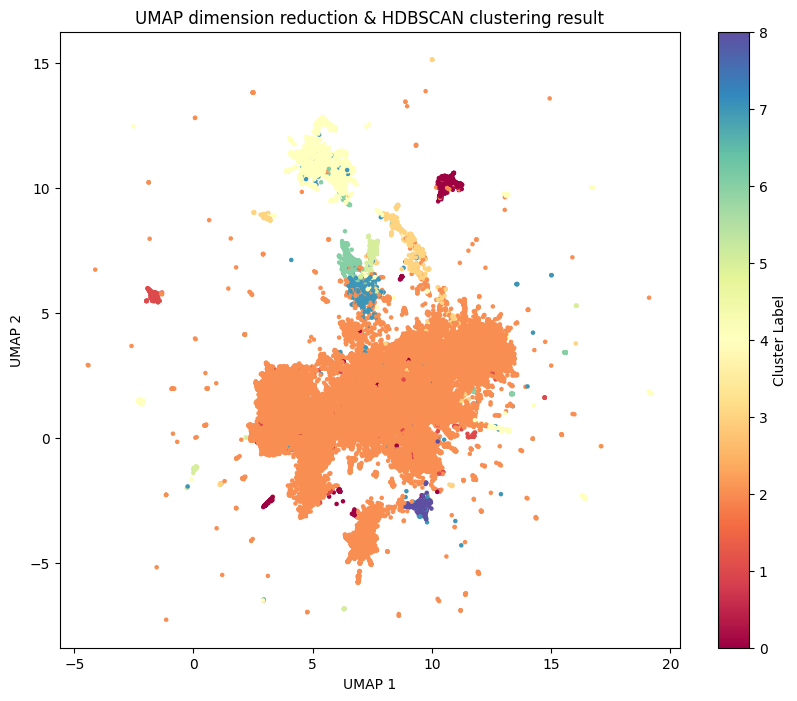

In [62]:
# -1 클러스터(노이즈)를 제외하고 산점도 시각화
mask = labels != -1
plt.figure(figsize=(10, 8))
plt.scatter(embedding_2d[mask, 0], embedding_2d[mask, 1], c=labels[mask], cmap='Spectral', s=5)
plt.title('UMAP dimension reduction & HDBSCAN clustering result')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.colorbar(label='Cluster Label')
plt.show()

## 데이터 프레임 추가

In [64]:
# 차원축소한 임베딩 값, 클러스터링 레이블을 원본 데이터 프레임에 추가
df['1st_cluster'] = labels
# df['embedding'] = clusterable_embedding
df.head()

,source,search_words,url,title,contents,tagged_contents,vector,umap_kmeans_cluster,1st_cluster
0,블로그,아기+잠깨,https://blog.naver.com/srhymin/223091161466,NaN,저희 아기는 신생아때부터 청각과 촉각이 예민해 잠도 깊게 못 잘 뿐더러 잠투정이 정...,"['저희', '아기', '신생아', '때', '청각', '촉각', '잠도', '못'...",[ 0.18305127 -1.2801502 -0.44998685 0.799018...,4,2
1,블로그,아기+잠깨,https://blog.naver.com/sukm83/223091879514,NaN,정신없는 주방한켠 뒤죽박죽 알 수 없는 용기에 양념과 소스가 담겨져 있기에 주방이 ...,"['정신', '방한', '뒤죽박죽', '알', '수', '용기', '양념', '소스...",[ 3.5914354e+00 -2.2061694e+00 1.5965343e+00 ...,1,2
2,블로그,아기+잠깨,https://blog.naver.com/dldptmf5134/223096875782,NaN,안녕하세요 지유맘입니다! 오늘은 지유가 이유식과 유아식 그 중간즈음 토핑식을 할 때...,"['지유', '맘', '오늘', '지유', '이유식', '유아식', '그', '중간...",[ 3.4138811e-01 -5.3281033e-01 -1.3500248e+00 ...,1,2
3,블로그,아기+잠깨,https://blog.naver.com/lia1100/223095799488,NaN,안녕하세요 라온엄마에요 오늘은 조금 특이한 아기 반찬을 준비했어요 방풍나물을 이용한...,"['엄마', '오늘', '조금', '아기', '반찬', '준비', '방', '나물'...",[ 0.9519698 -1.2839632 -0.3893606 -0.134541...,1,2
4,블로그,아기+잠깨,https://blog.naver.com/perfect_aj/223095824533,NaN,6 12개월 아기의 1일 권장 물섭취량은 220ml정도라고 한다. 음 우래기는.. ...,"['개월', '아기', '권장', '물섭취량', '정도', '음', '우리', '애...",[ 0.47277522 -0.9469169 1.0451334 -0.120348...,5,-1


In [65]:
# df를 csv로 저장
df.to_csv('1st_clustering_0512.csv', index=False, encoding='utf-8-sig')

# 일부 클러스터 제외 후 다시 저장!

In [ ]:
# 1) 복제
df2 = df.copy()

# 2) cluster가 -1인 행 제거
df2 = df2[~df2['cluster'].isin([-1])]

# 3) CSV로 저장
df2.to_csv("clustering_0505_YR_4thTry.csv", index=False, encoding="utf-8-sig")

# c-TF-IDF

In [2]:
from sklearn.feature_extraction.text import CountVectorizer

In [5]:
df = pd.read_csv('./1st_clustering_0512.csv')
texts = df['contents'].tolist()
texts = [clean_text(t) for t in texts]

In [69]:
df.head(3)

,source,search_words,url,title,contents,tagged_contents,vector,umap_kmeans_cluster,1st_cluster
0,블로그,아기+잠깨,https://blog.naver.com/srhymin/223091161466,NaN,저희 아기는 신생아때부터 청각과 촉각이 예민해 잠도 깊게 못 잘 뿐더러 잠투정이 정...,"['저희', '아기', '신생아', '때', '청각', '촉각', '잠도', '못'...",[ 0.18305127 -1.2801502 -0.44998685 0.799018...,4,2
1,블로그,아기+잠깨,https://blog.naver.com/sukm83/223091879514,NaN,정신없는 주방한켠 뒤죽박죽 알 수 없는 용기에 양념과 소스가 담겨져 있기에 주방이 ...,"['정신', '방한', '뒤죽박죽', '알', '수', '용기', '양념', '소스...",[ 3.5914354e+00 -2.2061694e+00 1.5965343e+00 ...,1,2
2,블로그,아기+잠깨,https://blog.naver.com/dldptmf5134/223096875782,NaN,안녕하세요 지유맘입니다! 오늘은 지유가 이유식과 유아식 그 중간즈음 토핑식을 할 때...,"['지유', '맘', '오늘', '지유', '이유식', '유아식', '그', '중간...",[ 3.4138811e-01 -5.3281033e-01 -1.3500248e+00 ...,1,2


## c-TF-IDF 함수 정의

In [6]:
# 클러스터별로 문서를 집계하는 함수
def aggregate_docs(docs, labels):
    """
    각 클러스터에 해당하는 문서들을 합쳐 하나의 aggregated 문서를 만듭니다.
    noise(-1)는 무시하며, 클러스터 순서는 df['cluster']에서의 등장 순서를 그대로 유지합니다.
    """
    # pd.unique는 원본 순서를 유지함 (노이즈(-1) 제거)
    unique_clusters = [x for x in pd.unique(labels) if x != -1]

    # 각 클러스터별 문서를 저장할 딕셔너리 생성
    cluster_docs = {cluster: [] for cluster in unique_clusters}

    for doc, label in zip(docs, labels):
        if label == -1:
            continue
        cluster_docs[label].append(doc)

    # 고유 클러스터 번호 순서대로 문서 집계
    aggregated_docs = [ " ".join(cluster_docs[cluster]) for cluster in unique_clusters ]
    return aggregated_docs, unique_clusters

In [7]:
def load_stopwords(file_path):
    """
    stopwords.csv 파일에서 불용어 목록을 로드합니다.
    """
    stopwords_df = pd.read_csv(file_path, header=None)  # 불용어 파일을 읽어옵니다.
    stopwords = stopwords_df[0].tolist()  # 첫 번째 열에 불용어가 저장되어 있다고 가정
    return stopwords

In [8]:
def remove_stopwords(text, stopwords):
    """
    텍스트를 공백 기준으로 토큰화하여 통합 불용어에 포함되지 않은 단어만 남긴 후,
    다시 공백으로 결합하여 문자열로 반환한다.
    불용어는 대소문자 구분 없이 처리된다.
    """
    tokens = text.split()  # 한글 텍스트는 소문자 변환 없이 그대로 두어야 하므로 그냥 split()
    stopwords_set = set(stopwords)  # 불용어 목록을 집합(set)으로 변환하여 효율성 향상
    filtered_tokens = [token for token in tokens if token not in stopwords_set]
    return ' '.join(filtered_tokens)

In [9]:
def c_tf_idf(docs, m, stopwords_path, ngram_range=(1, 2)):
    """
    c-TF-IDF 계산 함수:
    docs: 클러스터별로 집계된 문서 리스트 (각 클러스터의 모든 문서를 합친 하나의 문자열)
    m: 전체 원본 문서 수 (클러스터화 이전의 총 문서 개수)
    stopwords_path: 불용어 사전 파일 경로 (csv)
    ngram_range: n-gram 범위 (기본값: (1, 2) - uni-gram과 bi-gram 사용)
    """
    # 불용어 로드
    stopwords = load_stopwords(stopwords_path)

    # 각 문서에 대해 불용어 제거 적용
    processed_docs = [remove_stopwords(doc, stopwords) for doc in docs]

    # CountVectorizer를 사용해 단어 행렬 생성 (ngram_range 적용)
    count = CountVectorizer(ngram_range=ngram_range)
    t = count.fit_transform(processed_docs).toarray()  # shape: (n_clusters, n_terms)

    # 각 클러스터 내 단어 빈도를 클러스터 길이로 정규화하여 TF 계산
    tf = t / np.sum(t, axis=1, keepdims=True)

    # IDF 계산: 전체 문서 수(m)를 이용해 단어가 등장한 클러스터 수 기반의 IDF 산출
    idf = np.log((m + 1) / (np.sum(t > 0, axis=0) + 1)) + 1

    # c-TF-IDF 계산
    ctfidf = tf * idf
    return ctfidf, count


## c-TF-IDF 계산

In [10]:
# 1. 클러스터별로 문서를 집계
labels = list(df['1st_cluster'])  # df['cluster']에 있는 값 그대로 사용
aggregated_docs, cluster_keys = aggregate_docs(texts, labels)
# cluster_keys는 df['cluster']에서 추출한 고유 클러스터 번호 (노이즈 -1 제외)

/var/folders/_j/ygr94mmx6rs09px9_pzz74100000gn/T/ipykernel_18369/4049938069.py:8: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  unique_clusters = [x for x in pd.unique(labels) if x != -1]


In [11]:
# 2. 전체 원본 문서 수 (클러스터화 이전의 문서 개수)
m = len(texts)

In [13]:
# 3. c-TF-IDF 계산
stopwords_path = './postagging/dx_stopwords_custom_0510.csv'
ctfidf_matrix, vectorizer = c_tf_idf(aggregated_docs, m, stopwords_path)

In [ ]:
# 4. 각 클러스터별 상위 단어 출력
cluster_top_words = []

# feature names 추출
feature_names = vectorizer.get_feature_names_out()

# 각 클러스터별로 상위 100개 단어와 점수를 추출하여 리스트에 저장
for idx, cluster in enumerate(cluster_keys):
    top_n = np.argsort(ctfidf_matrix[idx])[::-1][:100]
    for i in top_n:
        cluster_top_words.append({
            'cluster': cluster,
            'word': feature_names[i],
            'score': ctfidf_matrix[idx][i]
        })

# 리스트를 DataFrame으로 변환
df_top_words = pd.DataFrame(cluster_top_words)

# 클러스터 번호로 정렬
df_top_words = df_top_words.sort_values(by=['cluster', 'score'], ascending=[True, False])
df_top_words

,cluster,word,score
1050,0,너무,0.032166
1051,0,사진,0.027083
1052,0,촬영,0.022986
1053,0,아기,0.022574
1054,0,우리,0.015873
...,...,...,...
445,8,위한,0.002791
446,8,쓰는,0.002791
447,8,오늘은,0.002763
448,8,밀리맘,0.002748


In [ ]:
# df_top_words df를 csv로 저장
df_top_words.to_csv('1st_top100_words_0512.csv', index=False, encoding='utf-8-sig')

## c-TF-IDF 시각화

In [ ]:
# plotly 설치
import sys
!{sys.executable} -m pip install plotly

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [17]:
# 유사도 히트맵
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns

# 덴드로그램
import scipy.cluster.hierarchy as sch
from scipy.spatial.distance import squareform
from scipy.cluster.hierarchy import dendrogram, linkage

# 인터렉티브 차트
import plotly.express as px

In [18]:
plt.rc('font', family='NanumGothic')

import matplotlib.pyplot as plt
import matplotlib as mpl

# macOS 기본 한글 글꼴로 설정
mpl.rcParams['font.family']          = ['AppleGothic']
mpl.rcParams['axes.unicode_minus']   = False  # minus 기호 깨짐 방지

In [19]:
# 토픽 내 대표 단어(상위 단어) 바 차트 시각화
def visualize_cluster_term_ranks(ctfidf_matrix, feature_names, matrix_index, cluster_label, top_n):
    """
    matrix_index: c-TF-IDF 행렬에서 해당 클러스터가 위치한 인덱스
    cluster_label: 원본 데이터의 클러스터 번호
    top_n: 상위 몇 개 단어를 보여줄지
    """
    top_idx = np.argsort(ctfidf_matrix[matrix_index])[::-1][:top_n]
    words = [feature_names[i] for i in top_idx]
    scores = ctfidf_matrix[matrix_index][top_idx]

    plt.figure(figsize=(8, 5))
    plt.barh(words, scores)
    plt.gca().invert_yaxis()  # 상위 단어가 위쪽에 표시되도록
    plt.xlabel("c-TF-IDF Score")
    plt.title(f"클러스터 {cluster_label} 대표 단어")
    plt.show()

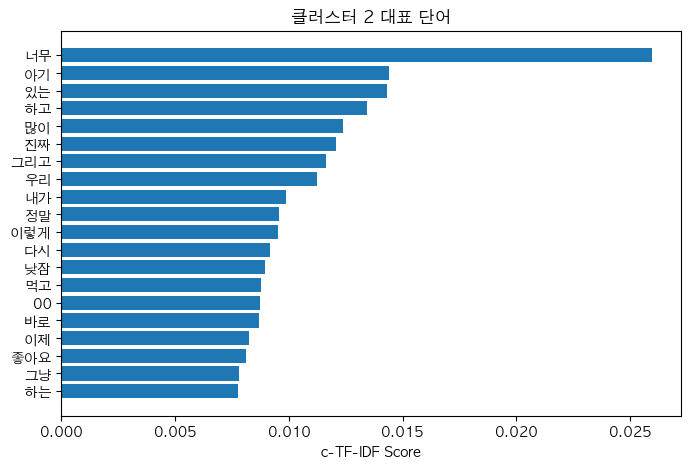

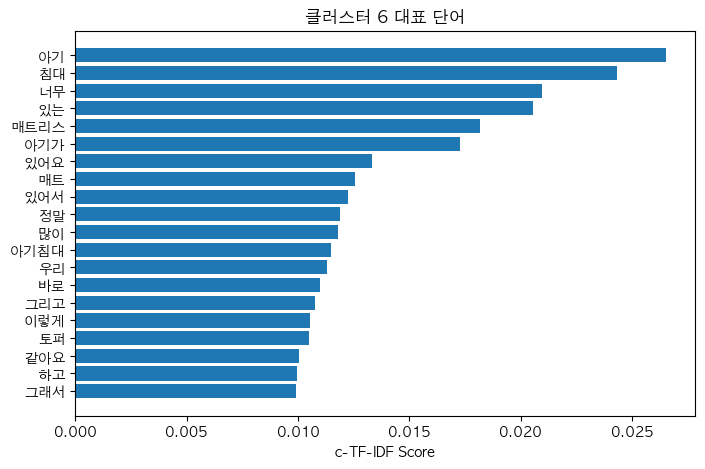

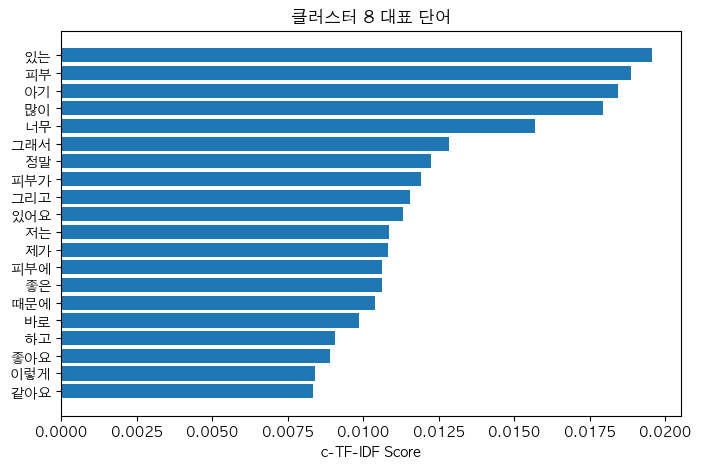

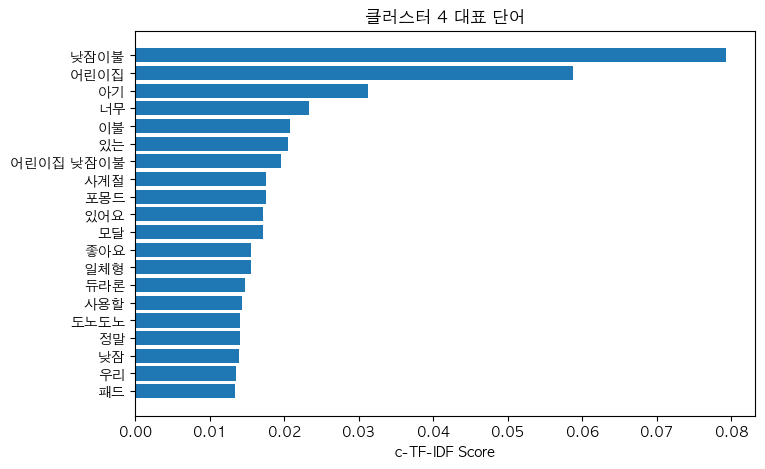

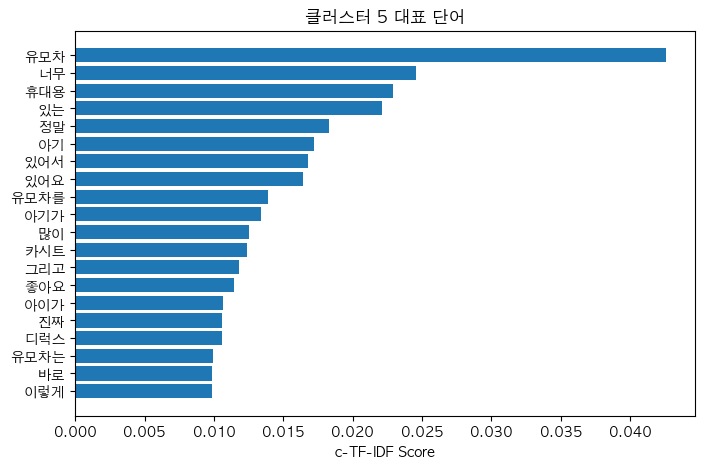

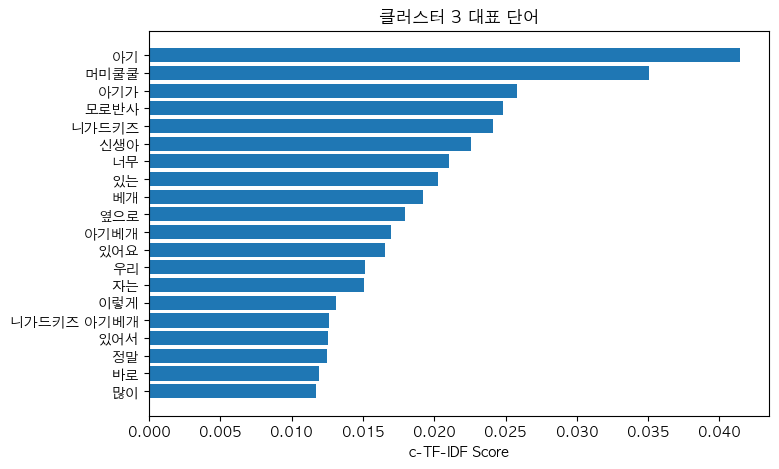

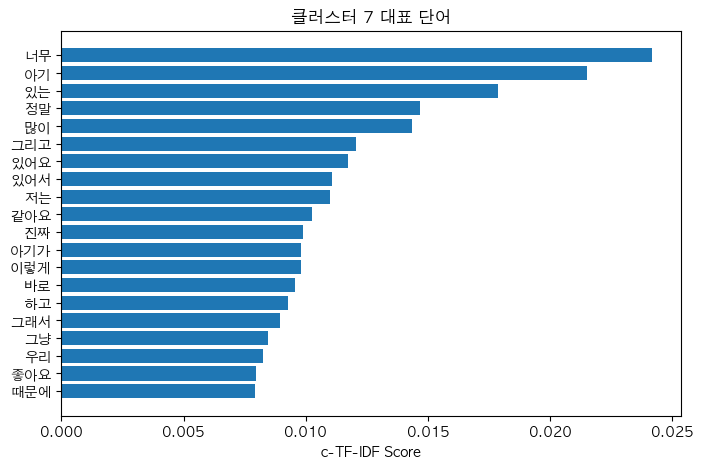

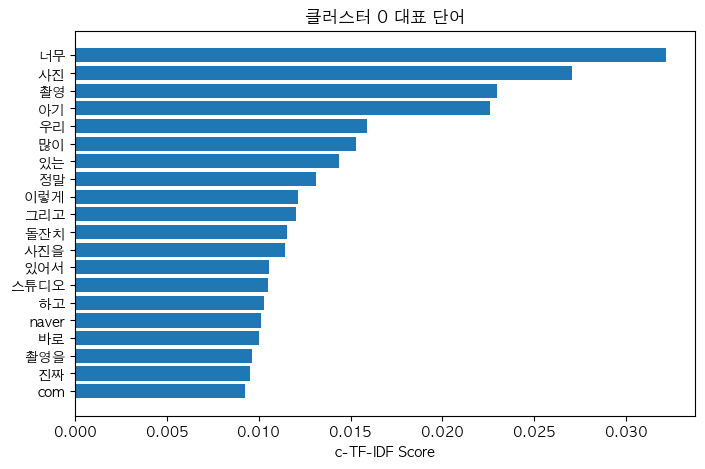

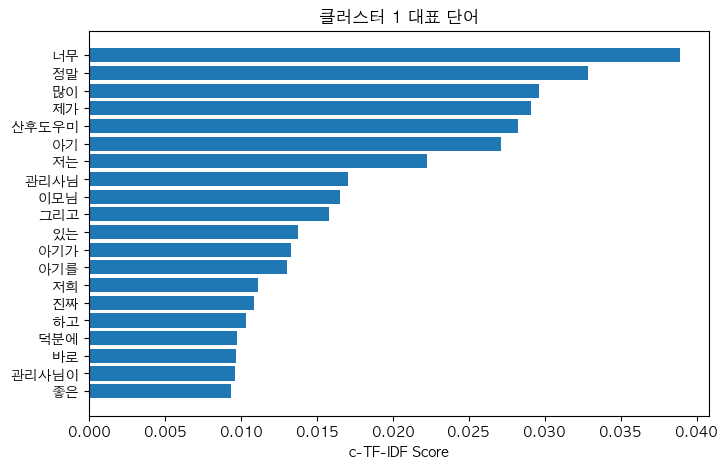

In [20]:
# 클러스터 별 대표 단어 바 차트
for idx, cluster in enumerate(cluster_keys):
    visualize_cluster_term_ranks(ctfidf_matrix, feature_names, matrix_index=idx, cluster_label=cluster, top_n=20)

In [ ]:
# 토픽 간 유사도 히트맵 시각화
def visualize_topic_heatmap(ctfidf_matrix):
    """
    ctfidf_matrix: 각 클러스터별 c-TF-IDF 행렬 (각 행이 클러스터)
    """
    # 클러스터 간 코사인 유사도 계산
    similarity = cosine_similarity(ctfidf_matrix)

    plt.figure(figsize=(10, 8))
    sns.heatmap(similarity, annot=True, fmt=".2f", cmap="coolwarm")
    plt.title("토픽 간 유사도 히트맵")
    plt.xlabel("토픽")
    plt.ylabel("토픽")
    plt.show()

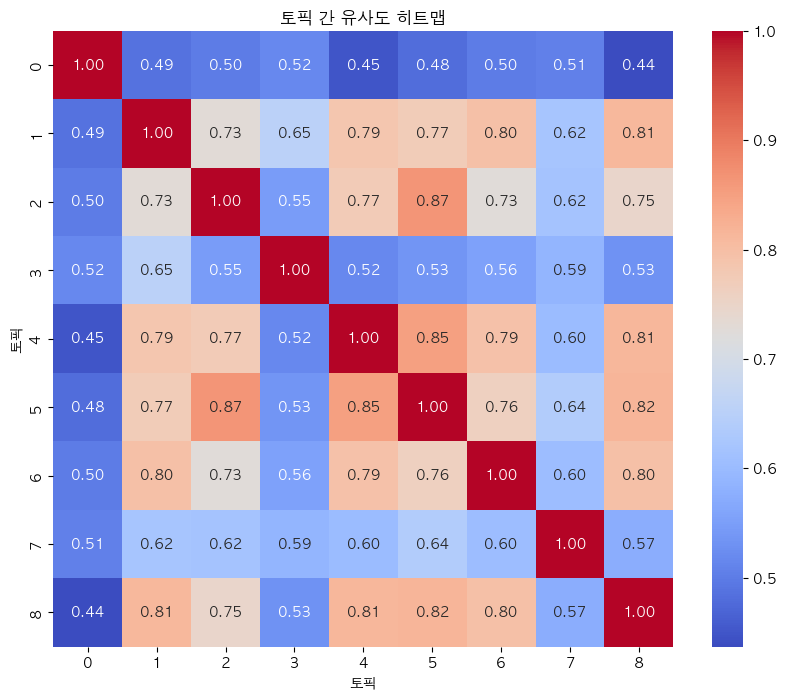

In [ ]:
visualize_topic_heatmap(ctfidf_matrix)

In [ ]:
# 토픽 계층 구조(계층적 클러스터링) 시각화
def visualize_topic_hierarchy(ctfidf_matrix, labels=None):
    """
    ctfidf_matrix: 각 클러스터의 c-TF-IDF 벡터 (각 행이 클러스터)
    labels: (선택사항) 각 클러스터에 대응하는 라벨 리스트
    """
    # 계층적 군집화를 위한 linkage 계산 (워드 방법 사용)
    Z = sch.linkage(ctfidf_matrix, method='ward')

    plt.figure(figsize=(10, 7))
    dendro = sch.dendrogram(Z, labels=labels)
    plt.title("토픽 계층 구조 덴드로그램")
    plt.xlabel("토픽")
    plt.ylabel("거리")
    plt.show()

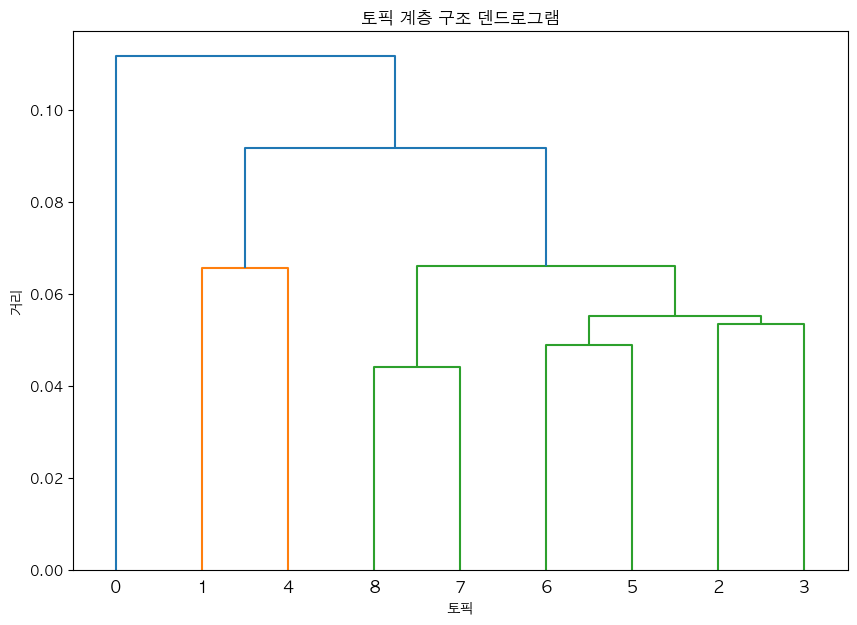

In [ ]:
# 클러스터 번호를 라벨로 사용
visualize_topic_hierarchy(ctfidf_matrix, labels=[str(label)
                                                 for label in cluster_keys])

# 계층적 클러스터링 (덴드로그램)

	1. Ward 메소드 (워드 메소드):
	• 기준: 두 클러스터를 합칠 때, 합쳐진 클러스터 내의 분산(즉, 데이터들의 평균으로부터의 거리 제곱의 합)이 최소가 되도록 합니다.
	• 데이터: 보통 워드 메소드는 유클리드 거리를 전제로 합니다. 즉, 원래의 워드 벡터의 좌표 값을 이용해 각 클러스터의 분산을 계산합니다.
	• 의미: y축은 두 클러스터를 합칠 때 증가하는 분산(또는 비용)을 나타내며, 이 값이 작을수록 서로 비슷한 데이터들이 모여 있다고 볼 수 있습니다.
    
	2. Average 메소드 + 코사인 거리 행렬:
	• 기준: 두 클러스터가 합쳐질 때, 두 클러스터에 속한 모든 데이터 쌍 간의 코사인 거리의 평균값을 기준으로 병합합니다.
	• 데이터: 이미 코사인 거리 행렬을 계산해 사용하므로, 코사인 유사도(또는 유사하지 않음 정도)를 반영합니다.
	• 의미: y축은 클러스터 간의 평균 코사인 거리, 즉 두 클러스터의 “다름” 정도를 나타내며, 값이 클수록 두 클러스터 간의 평균 거리가 크다는 뜻입니다.

요약하자면: <br>
	• Ward 메소드는 원래의 워드 벡터 좌표를 사용하여 클러스터 내 분산이 최소가 되도록 합치는 반면, <br>
	• Average 메소드는 미리 계산한 코사인 거리 행렬을 사용하여 두 클러스터의 평균 거리를 기준으로 병합합니다.

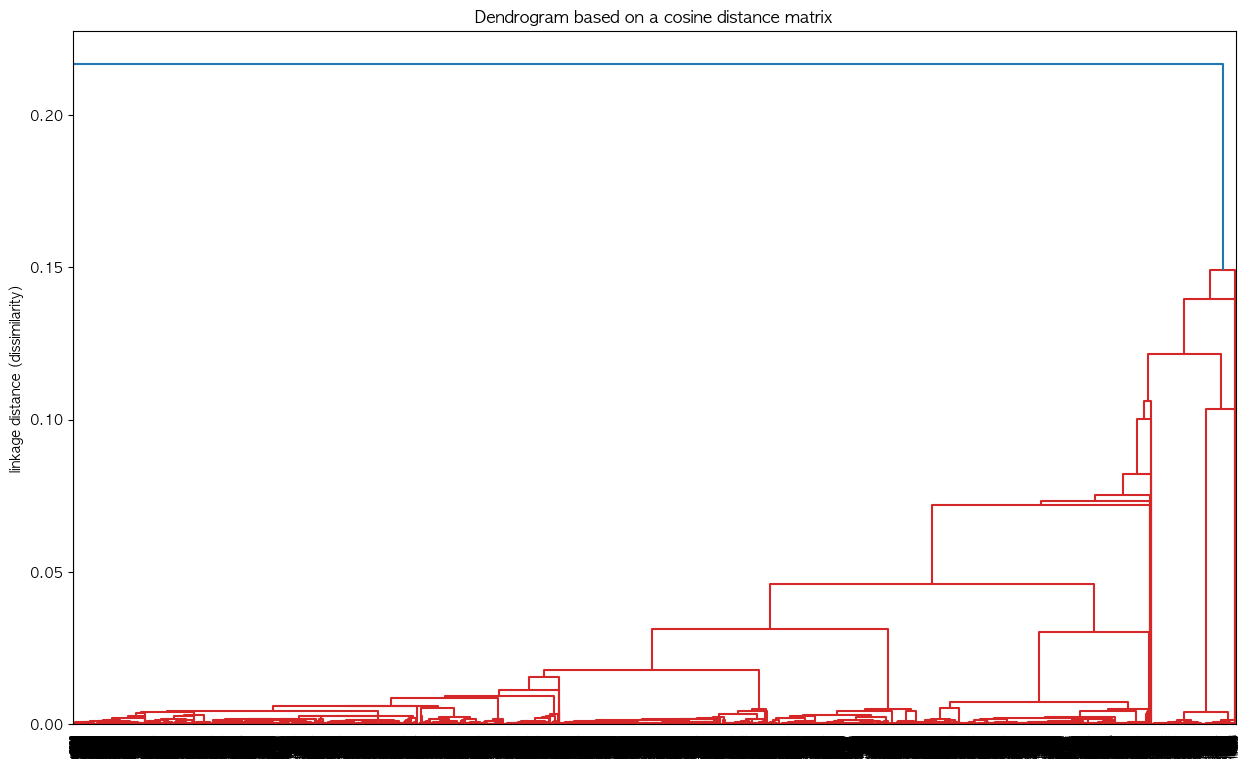

In [ ]:
# 데이터 포인트 덴드로그램 -> 계층적 클러스터링 수행 (linkage 메서드)

# 정방 행렬을 condensed 형태(1차원 배열)로 변환
condensed_dist = squareform(distance_matrix)

# linkage 함수에 변환된 거리를 사용
Z = linkage(condensed_dist, method='average')

plt.figure(figsize = (15, 9))
dendrogram(Z,
           orientation = 'top',
           distance_sort= 'descending',
           show_leaf_counts = False)
plt.title("Dendrogram based on a cosine distance matrix")
plt.ylabel("linkage distance (dissimilarity)")
plt.show()

# BERTopic 파이프라인

### BERTopic

import sys
!{sys.executable} -m pip install bertopic
# 시각화 옵션까지 필요하다면:
!{sys.executable} -m pip install "bertopic[visualization]"

In [ ]:
from bertopic import BERTopic

In [ ]:
topic_model = BERTopic(
    embedding_model=None,          # 내부 임베딩 비활성화
    umap_model=umap_model,
    hdbscan_model=hdbscan_model
)

In [ ]:
topics, probs = topic_model.fit_transform(
    texts,
    embeddings=distance_matrix
)

ValueError: operands could not be broadcast together with shapes (10,) (10,22741) 

### c-TF-IDF 시각화 (BERTopic)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# 토픽 번호 0의 c-TF-IDF 결과를 시각화
topic_num = 0
topic_words = topic_model.get_topic(topic_num)
                # 결과: [(단어, 점수), ...]

# 단어와 점수를 분리
words = [word for word, score in topic_words]
scores = [score for word, score in topic_words]

plt.figure(figsize=(10, 5))
plt.barh(words, scores)
plt.xlabel("c-TF-IDF Score")
plt.title(f"토픽 {topic_num}의 c-TF-IDF 시각화")
plt.gca().invert_yaxis()  # 높은 점수가 위쪽에 오도록 설정
plt.show()

In [ ]:
# 토픽 별 인터랙티브 차트 시각화
fig = topic_model.visualize_barchart(topic=topic_num)
fig.show()

In [ ]:
# Visualization
# PLDAVIS와 비슷한 형태로 시각화를 지원해준다.
topic_model.visualize_topics()
# 앞서 calculate_probabilities를 했다면 특정 Document에 대해서 Topic별 Probabilites를 확인할 수 있다.
# 여기서 예시는 index 200번째 Document
topic_model.visualize_distribution(probs[200], min_probability=0.015)
# Topic 별 Hierarchy를 보여준다.
topic_model.visualize_hierarchy(top_n_topics=50)
# Topic을 대표하는 상위 단어 5개씩 보여준다.
topic_model.visualize_barchart(top_n_topics=5)
# Topic간 유사도를 Cosine Similarity로 계산후 Heatmap으로 표현
topic_model.visualize_heatmap(n_clusters=20, width=1000, height=1000)
# Topic내 대표하는 단어들에 대해서 c-tf-idf로 계산해서 각 단어가 Topic에서 차지하는 중요도를 계산했던 것을 Rank 순대로 보여준다.
topic_model.visualize_term_rank()